<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management, Analysis and Security</h1>

<h2 align='center'> Lab 03 - Visualisation & Hypothesis Testing</h2>
<h5 align='center'><sub> Author: Afzal Ahmad, 2020 </sub></h5>

*****

## Aim
There are two main aims in this lab:
1. Introduce you to produce visualisations in Python using [Matplotlib](https://matplotlib.org), and discover methods for analysing the usefulness of a plotting technique
2. Introduce you to using hypotheses for attempting to prove an argument with data, and how this can be tested in a scientific and repeatable manner.
*****

## Learning Outcomes
The following course learning outcomes apply to this lab:
- L04: Formulate and extract descriptive and predictive statistics from data
- L05: Analyse and interpret results from descriptive and predictive data analysis

***

## Preparation

Before starting this lab, we suggest you complete the following:
- Watch the lectures this week
- Keep up to date to the labs!


The following functions may be useful for this lab:

| Function                     | Description |
| ---:                         | :---        |
| `plt.plot(x,y)`              | plots y vs x as a line (default) or as points |
| `plt.subplot(r,c,i)`         | sets up a grid of plots with `r` rows, `c` cols and `i` index (starts with 1) |
| `plt.scatter(x,y)`, `plt.hist(x)`, `plt.bar(x,y)`, etc  | produces a scatter plot, histogram or bar chart |

***

## Resources
- <a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html">Matplotlib's Pyplot package</a>: for all your plotting needs
- <a href="https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html">Matplotlib's Colormaps</a>: all the colour maps you could ever want (maybe)
- <a href="https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests">SciPy's Statistical Tests</a>: you'll only need the first four (starting with "ttest_"), but there are plenty of others if you're interested
*****

## Lab Background

In [1]:
# Important Imports
# MAKE SURE YOU RUN THIS CELL FIRST

import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt    # main package
from matplotlib import cm          # colour maps
import seaborn as sns              # makes prettier plots
plt.style.use('seaborn')

# hypothesis testing
from scipy import stats

C:\Users\Andrew Ha\AppData\Local\Temp\ipykernel_2168\4091454365.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


This next cell block is filled with code, so have a look at the output and see if you can understand what all or most of the settings do. Feel free to adapt this code when you create your own plots, and have fun with the colours and other options available to you. (Don't overthink the underlying data, it was just randomised so that we have something to work with.)

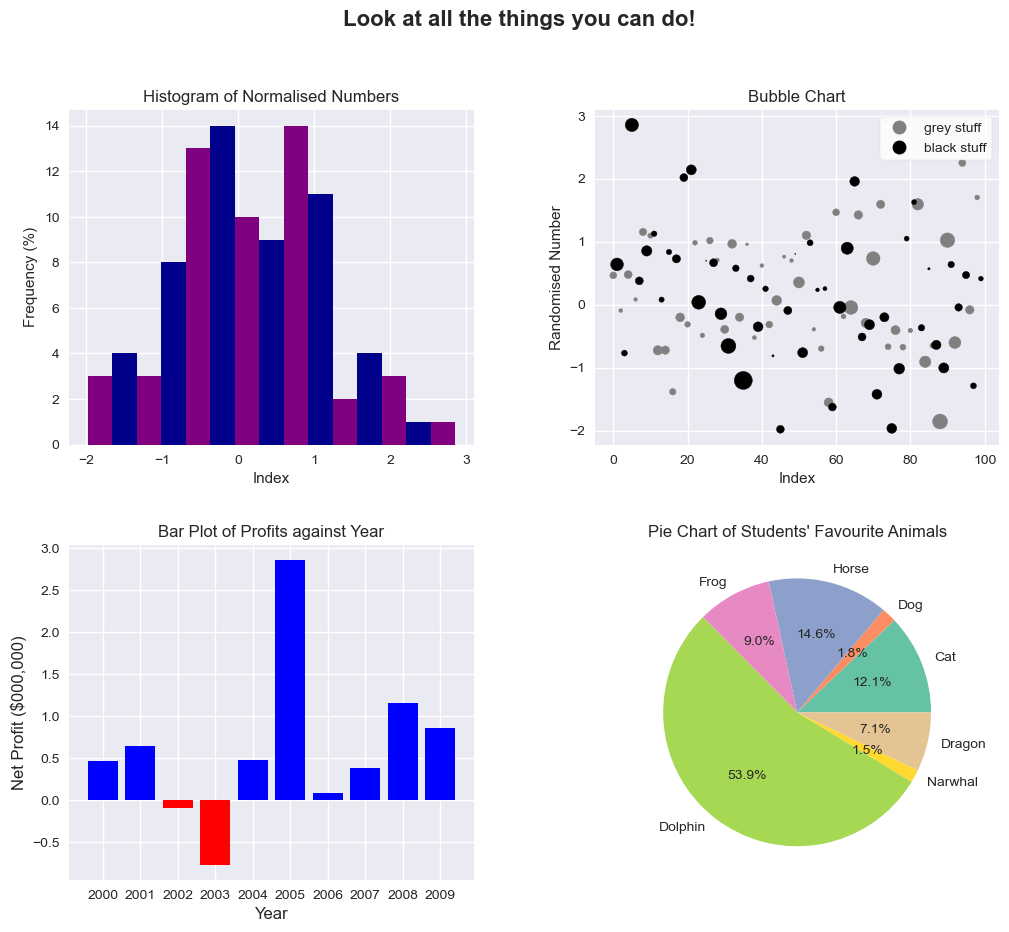

In [2]:
# some random data for plotting
np.random.seed(2420)
x = np.arange(100)
y = np.random.randn(100)
z = np.random.randn(100)

# changing the settings of the output
fig = plt.figure(figsize=(12,10))    # changes the output plotting size
fig.subplots_adjust(wspace=0.3, hspace=0.3)    # increases the distance between subplots

###

# histogram subplot
ax1 = fig.add_subplot(221)    # equivalent to plt.subplot(2,2,1)

# assigning to n, bins, patches allows us to customise the plot further
# n is the height of each "bin" or column, bins is the edge location of each bin
# and patches is the list of bins that we'll use to adjust the colour
n, bins, patches = plt.hist(y, bins=15, color="darkblue")

# for example, colour each second bin with something different to increase contrast
for p in patches[::2]:
    plt.setp(p, "facecolor", "purple")

# finally, no plot is complete without labels and a title
ax1.set_xlabel("Index")
ax1.set_ylabel("Frequency (%)")
ax1.set_title("Histogram of Normalised Numbers")

###
    
# scatter subplot
ax2 = fig.add_subplot(222)

# scatter some grey points, and on the same plot scatter some black points
plt.scatter(x[::2],y[::2], color="grey", s=np.abs(z[::2])*50, label="grey stuff")
plt.scatter(x[1::2],y[1::2], color="black", s=np.abs(z[1::2])*50, label="black stuff")

# labels and title (get into the habit of including these)
ax2.set_xlabel("Index")
ax2.set_ylabel("Randomised Number")
ax2.set_title("Bubble Chart")

# the position of the legend is determined automatically
# try changing some of these parameters to see what they do!
handles = [plt.Line2D([0], [0], marker='o', color='w', label='Scatter',
                          markerfacecolor='grey', markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', label='Scatter',
                           markerfacecolor='black', markersize=10)]
ax2.legend(handles, ["grey stuff","black stuff"], frameon=True, facecolor="white")

###

# bar (well, really column) subplot
ax3 = fig.add_subplot(223)
x_ten = x[:10]
y_ten = y[:10]

# blue for positive, red for negative
col_ten = []
for i, y_point in enumerate(y_ten):
    if y_point >= 0:
        col_ten.append("blue")
    else:
        col_ten.append("red")

# plotting the column chart
plt.bar(x[:10],y[:10], color=col_ten,
        tick_label=np.arange(2000,2010))

# we changed the size so it doesn't get mixed up with the 
ax3.set_xlabel("Year", size=12)
ax3.set_ylabel("Net Profit ($000,000)", size=12)
ax3.set_title("Bar Plot of Profits against Year")

###

# pie subplot
# (don't worry about the underlying data, it's all fake)
ax4 = plt.subplot(224)
y_pie = y[1:8]

# use help(cm) to see a list of the colour schemes
# replace "Set2" with other options like "magma", "plasma", "RdYlGn" for other outputs
colors = cm.Set2(np.arange(len(y_pie))/len(y_pie))    
plt.pie(np.abs(y_pie), colors=colors, autopct='%.1f%%',    # autopct makes the percentages show up on the chart
        labels=["Cat","Dog","Horse","Frog","Dolphin","Narwhal","Dragon"])

ax4.set_title("Pie Chart of Students' Favourite Animals")

###

# remember to output the plot at the end
# (Jupyter will do it for you if you don't, but it's a good habit)
plt.suptitle("Look at all the things you can do!", size=16, weight="bold")
plt.show()

Remember, when you're asked to visualise some data, there may be many correct responses - a scatter plot may be just as useful as a histogram, or a pie chart might make as much sense as a stacked bar chart.

Likewise, many plots may be unsuitable for certain data - for example, if you need to show the distribution of data with thousands of datapoints, a scatter plot would create overlaps that would hide the true distribution, so a histogram or box plot would be better here. Before you dive into coding your plots, make sure you've chosen the appropriate type.

Visualisations are primarily used to convey relevant information in a concise way, so we don't want to overload the viewer with a lot of values. A good question to ask yourself is: if my chart didn't have many numbers, would it still convey the message I want it to? If the answer is no, you might be taking the wrong approach.

Here's a quick guide to the various types of charts you have available to you. You may also create charts that we haven't listed here, but make sure that they're easy to understand. Unfortunately we can't give a tutorial on each of the charts (or this lab would be extremely long), but there are plenty of online resources such as <a href="https://matplotlib.org/gallery.html">the Matplotlib Gallery</a>, and the `help(plt)` function can guide you as well.

<b>Do you want to compare values?</b> If you need to compare one or many value sets, and need to visualize the lows and highs in the data sets, you would need:
- <b>Column Chart</b> (`plt.bar`, [documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html)): A column chart is used to show a comparison among different items. While this looks similar to a histogram, it shouldn't be used to show distribution.

- <b>Side-by-side Column Chart</b> (`plt.bar(1,h1,w), plt.bar(1+w,h2,w)`, [documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html)): Like a column chart, but it has multiple columns for each x. This should be used to compare items across different x values AND within the same x value.

- <b>Bar Plot</b> (`plt.barh`, [documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.barh.html)): A bar graph, basically a horizontal column chart, should be used to avoid clutter when one data label is long or if you have more than 10 items to compare. This type of visualization can also be used to display negative numbers.

- <b>Line Plot</b> (`plt.plot`, [documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html)): A line graph reveals trends or progress over time and can be used to show many different categories of data. You should use it when you chart points that are related to neighbouring points, such as a time series. It shouldn't be used for independent datapoints.

- <b>Scatter Plot</b> (`plt.scatter`, [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)): A scatter plot will show the relationship between two different variables or it can reveal the distribution of the y variable as the x value changes. It should be used when there are many different data points, and you want to highlight similarities in the data set. It's also useful when looking for outliers or for understanding the distribution of your data. It shouldn't be used to show the distribution if the x value is irrelevant.

<b>Do you want to show the composition of something?</b> Use this type of chart to show how individual parts make up the whole of something:
- <b>Pie Chart</b> (`plt.pie`, [documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html)): A pie chart shows a static percentages and how categories represent part of a whole. A pie chart represents numbers in percentages, and the total sum of all segments needs to equal 100%. Do not use this if you have more than 10 or so categories (you can combine many into an 'Other' category if this helps), or when the percentages are similar. Remember, if you exclude the percentages from your graph, does it still prove your point?

- <b>Stacked Column Chart</b> (`plt.bar(x1,h1), plt.bar(x2,h2,bottom=h1)`, [documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html)): This should be used to compare many different items across different x values (usually year or category), and show the composition of each item being compared. This shouldn't be used if you're trying to compare items within the same x value.

- <b>Area Chart</b> (`plt.stackplot`, [documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.stackplot.html)): An area chart is basically a line chart, but the space between the x-axis and the line is filled with a color or pattern. It is useful for showing part-to-whole relations. It helps you analyze both overall and individual trend information. These should be used cautiously, as it can be unclear whether the data is stacked or overlapping.


<b>Do you want to understand the distribution of your data?</b> Distribution charts help you to understand outliers, the normal tendency, and the range of information in your values.
- <b>Scatter Plot</b> (`plt.scatter`, [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)): In addition to the description about scatter plots earlier, scatter plots are especially useful to show the location of outliers (in terms of both x and y), and how the distribution changes as x increases.

- <b>Box Plot</b> (`plt.boxplot`, [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html)): A boxplot is a way to show the distribution of one-dimensional data based on the five-number summary: minimum, first quartile, median, third quartile, and maximum. This type of plot can also show outliers, and you can create side-by-side boxplots to compare distributions between categories (eg. height of each gender).

- <b>Histogram</b> (`plt.hist`, [documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html)): A histogram is an accurate representation of the distribution of numeric data. To create a histogram, first we divide the entire range of values into a series of intervals (or 'bins'), and second we count how many values fall into each interval. The bins are consecutive and non-overlapping intervals of a variable.

<b>Do you want to better understand the relationship between value sets?</b> Relationship charts are suited to showing how one variable relates to one or numerous different variables. You could use this to show how something positively effects, has no effect, or negatively effects another variable.

- <b>Scatter Plot</b>, <b>Coloured Scatter Plot</b> (`plt.scatter(c=colours)`, [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)) or <b>Bubble Chart</b> (`plt.scatter(s=size)`, [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)): A coloured scatter or bubble chart is similar to a normal scatter plot in that it can show distribution or relationship, but it includes a third data set, which is indicated by the colour / size of the bubble. Try not to create a coloured bubble chart - that's usually too much to interpret for the viewer.

******
We've waffled on long enough. Time for some exercises!

We'll be using an **Airline Satisfaction dataset**, which contains the responses to surveys of passengers based on a few different categories. Here's a description of all the columns:

| Name               | Description |
| ---:               | :---        |
| `gender`           | gender of the passenger; "Male" or "Female" |
| `age`              | age of the passenger in years |
| `class`            | class of the passenger's ticket; "Eco", "Eco Plus" or "Business" |
| `seat_comfort`     | passenger's rating of seat comfort on a scale of 1-5, integer only |
| `checkin_service`  | passenger's rating of service at check-in on a scale of 1-5, integer only |
| `inflight_service` | passenger's rating of in-flight service on a scale of 1-5, integer only |
| `cleanliness`      | passenger's rating of cleanliness during flight on a scale of 1-5, integer only|
| `dep_delay`        | delay of passenger's flight departure in minutes|
| `arr_delay`        | delay of passenger's flight arrival in minutes |

## Question 1: Analysing Graphs
To help you realise the pitfalls of certain visualisations (and thus help you choose the correct plot to use when you need to visualise data), we'll show you some graphs and you can decide whether they're appropriate. As this is primarily a discussion question, we encourage you to compare your answers with your neighbours or with your lab demonstrator.

Given a dataset of satisfaction scores, we want to compare scores between categories, as well as scores within each category. Visualisation will help us here, but we need to figure out what the best visualisation to use is.

In [3]:
# import data
air_sat = pd.read_csv("data/airline_satisfaction.csv", index_col=0)

### Q1.1: Scatter Plot

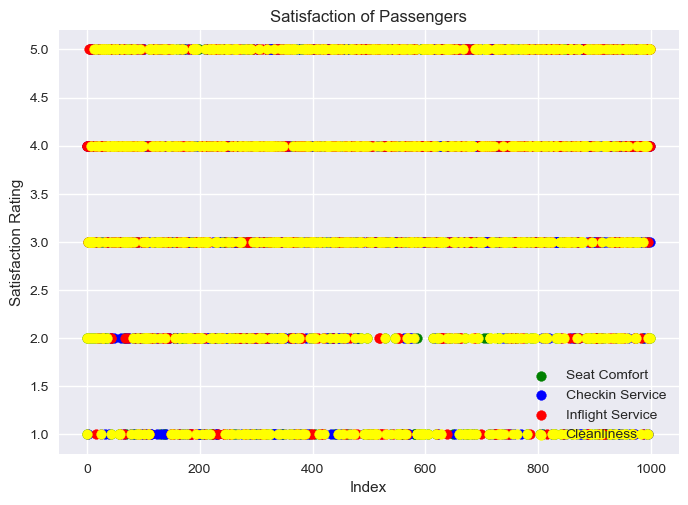

In [4]:
# set up overall figure
fig = plt.figure()
ax = fig.add_subplot(111)

# scatter some plots, different colour for each category
plt.scatter(air_sat.index, air_sat.loc[:,"seat_comfort"], color="green", label="Seat Comfort")
plt.scatter(air_sat.index, air_sat.loc[:,"checkin_service"], color="blue", label="Checkin Service")
plt.scatter(air_sat.index, air_sat.loc[:,"inflight_service"], color="red", label="Inflight Service")
plt.scatter(air_sat.index, air_sat.loc[:,"cleanliness"], color="yellow", label="Cleanliness")

# labels and title
ax.set_xlabel("Index")
ax.set_ylabel("Satisfaction Rating")
ax.set_title("Satisfaction of Passengers")

# include an legend (automatic from the scatter labels) and output
plt.legend()
plt.show()

Hopefully, this should be easy to answer - there are a few obvious issues with it. 

### Q1.2: Side-by-Side Boxplot

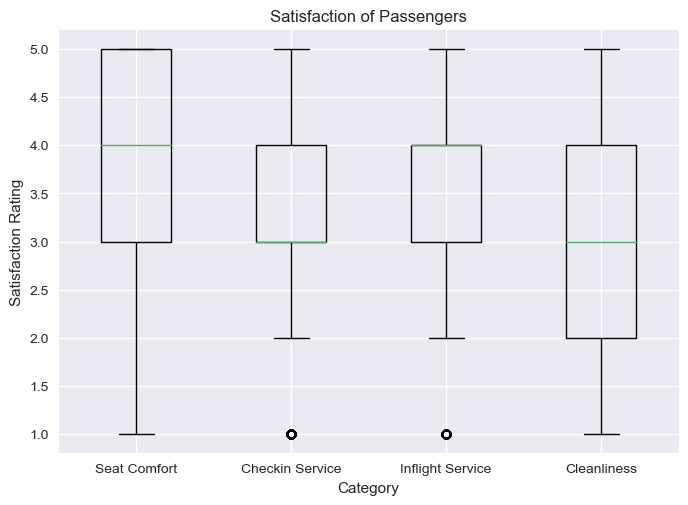

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)

# boxplot, with a list of categories
plt.boxplot([air_sat.loc[:,"seat_comfort"],
             air_sat.loc[:,"checkin_service"],
             air_sat.loc[:,"inflight_service"],
             air_sat.loc[:,"cleanliness"]])

# category labels, overall labels and title
plt.xticks([1,2,3,4],["Seat Comfort", "Checkin Service", "Inflight Service", "Cleanliness"])
ax.set_xlabel("Category")
ax.set_ylabel("Satisfaction Rating")
ax.set_title("Satisfaction of Passengers")

plt.show()

The issue with this plot is more subtle, and the answer lies in the way it shows Checkin Service and Inflight Service satisfactions, even though they're dist. Does this plot show all the available information we have, or can we do better?

### Q1.3: Stacked Column Chart

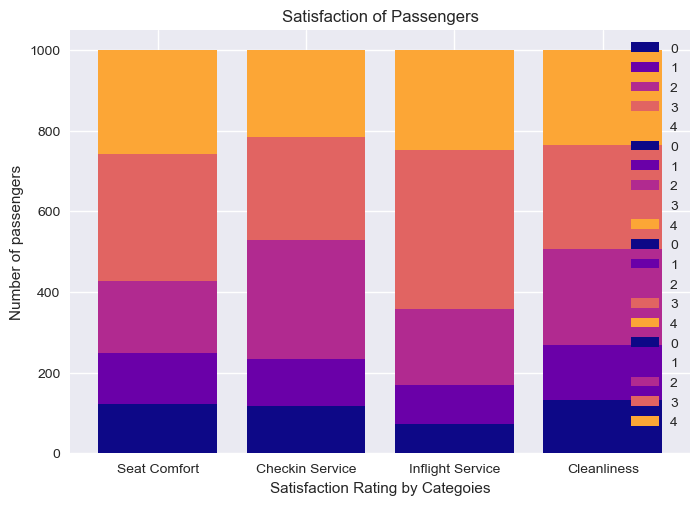

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

cols = air_sat.columns[3:7]
colors = cm.plasma(np.arange(5)/5.)
width = 0.50

# match the "bottom" of a column to the height of its previous column so it stacks
for i,col_name in enumerate(cols):
    col = air_sat.loc[:,col_name]
    old_height = 0
    for rating in range(5):
        height = len(col[col==rating+1])
        plt.bar(i, height, bottom=old_height, color=colors[:][rating], label=rating)
        old_height = old_height+height
        
plt.xticks([0,1,2,3],["Seat Comfort", "Checkin Service", "Inflight Service", "Cleanliness"])
ax.set_xlabel("Satisfaction Rating by Categoies")
ax.set_ylabel("Number of passengers")
ax.set_title("Satisfaction of Passengers")

plt.legend()
plt.show()

We're certainly getting closer, but this plot still has a missing part (which is quite essential), and isn't quite appropriate for the data. Describe what pitfalls it may have and give an example of a comparison that this plot would not be useful for. As an extra challenge, add code to the above block to include the missing part appropriately (i.e. without covering information in the plot).

### Q1.4: Side-by-Side Column Chart

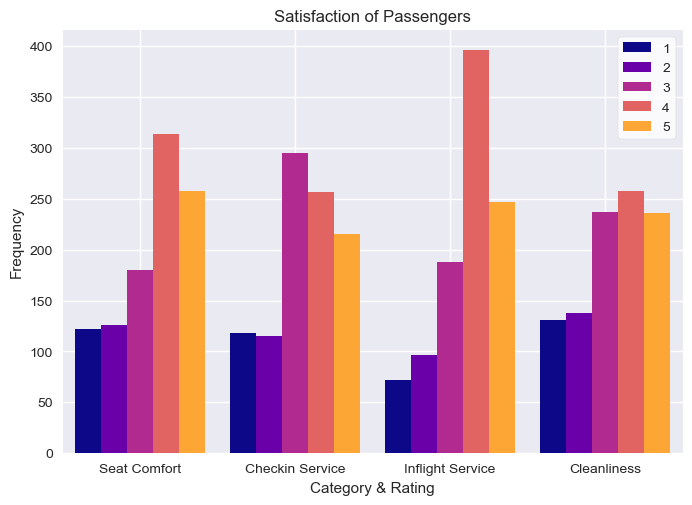

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

cols = air_sat.columns[3:7]
colors = cm.plasma(np.arange(5)/5.)    # returns a list of 5 RGBA values
width = 0.5

# matching the left edge of each column to the right edge of the previous one so it's side-by-side
# if it's hard to understand all the sums, try changing some numbers and see how that affects the plot
for i,col_name in enumerate(cols):
    col = air_sat.loc[:,col_name]
    for rating in range(5):
        plt.bar(1+(i*width*6)+(width*rating), len(col[col==rating+1]), width, color=colors[:][rating])

# matching the category labels to the location, adjusting the x-bounds of the plot and adding the title
plt.xticks(1+width*2+np.arange(4)*width*6,
           ["Seat Comfort", "Checkin Service", "Inflight Service", "Cleanliness"])
plt.xlim([1-width, 1+width*23]) #it was 23
ax.set_xlabel("Category & Rating")
ax.set_ylabel("Frequency")
ax.set_title("Satisfaction of Passengers")

rating = {1,2,3,4,5}
plt.legend(rating, frameon = True, facecolor="white")
plt.show()

We've come up with this chart as the best way to compare between categories, as well as within categories. It's still missing something, which we challenge you to add to the plot to perfect it. Of course, it may still have some issues, and we accept that any plot we create may not be perfect - so we also challenge you to find errors in our plot and, more importantly, see if you can produce a better one.

In [8]:
# TODO: following the above side-by-side column chart, add the missing part, and create a better visualization here


## Question 2: Your Own Visualisations
### Q2.1: Seat Comfort
Using the same dataset of airline passenger satisfaction ratings, we want to visualise how age affects seat comfort rating. Most importantly, we want to compare the mean or median across different age groups:

| Age Group  | Ages               |
| ---:       | :---               |
| 0-17       | Child              |
| 18-24      | Young Adult        |
| 25-34      | Middle-Aged Adults |
| 35-59      | Older Adults       |
| 60+        | Senior Adults      |

We also want to visualise the distribution in each age group (which you can show as a range, as quartiles, or any other way you choose), and if applicable any outliers in the age groups. Finally, add titles, labels and colours to the plot to make it visually appealing (without making it harder to read or understand).

If you'd like, you can adjust, add, or combine any of the above age groups *if you believe there is reason to do so* (eg. if an age group varies considerably, or if there are too few responses in a particularly group). Make sure you have a minimimum of 4 groups and a maximum of 6 groups.

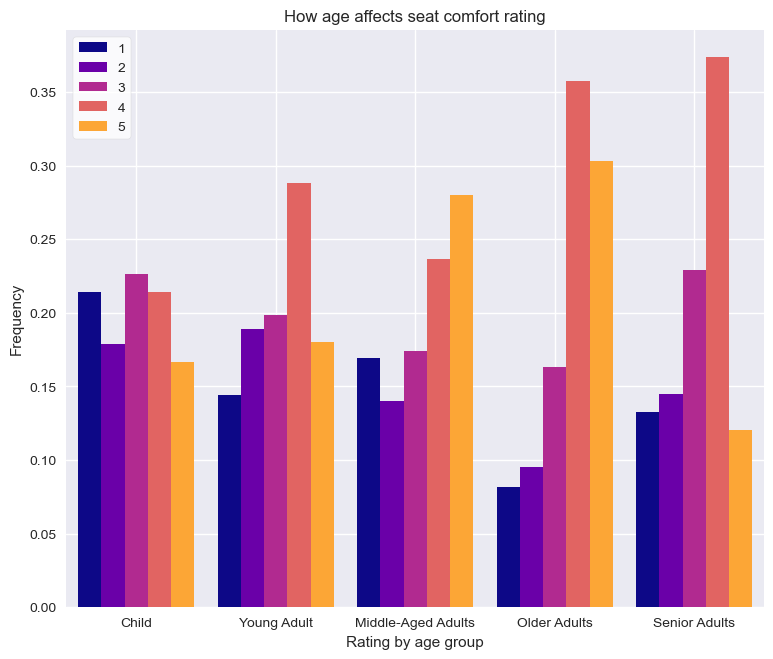

In [9]:
fig = plt.figure(figsize=(9,7.5))    # feel free to change the figsize if you wish
ax = fig.add_subplot(111)

# TODO: complete your own visualization here
ages = {'Child': [0,17], 'Young Adult': [18,24], 'Middle-Aged Adults':[25,34], 
        'Older Adults':[35,59], 'Senior Adults':[60,200]}
for i,num in enumerate(ages):
    people = air_sat[(air_sat['age'] >= ages[num][0]) & (air_sat['age'] <= ages[num][1])]
    
    for rating in range(5):
        population = len(people[people['seat_comfort'] ==rating+1])
        plt.bar(1+(i*width*6)+(width*rating), population/len(people),width, color=colors[:][rating])
        
# matching the category labels to the location, adjusting the x-bounds of the plot and adding the title
plt.xticks(1+width*2+np.arange(5)*width*6,
           ["Child", "Young Adult", "Middle-Aged Adults", "Older Adults", "Senior Adults"])
plt.xlim([1-width, 1+width*29]) #it was 23
ax.set_xlabel("Rating by age group")
ax.set_ylabel("Frequency")
ax.set_title("How age affects seat comfort rating")    
    
rating = {1,2,3,4,5}
plt.legend(rating, frameon = True, facecolor="white")
plt.show()


### Q2.2: All Categories
Now that you've visualised the data for one category, can you extend it to visualise all categories in one plot? Depending on which plot you used in the previous question, you may find it useful to use a different type of chart for this. We mainly want to compare the means (or medians) both *between* age groups (eg. seat comfort rating between children and young adults) and *within* age groups (eg. seat comfort rating versus cleanliness rating for older adults). If you can include a distribution measure and make it look visually appealing, that's an added bonus.

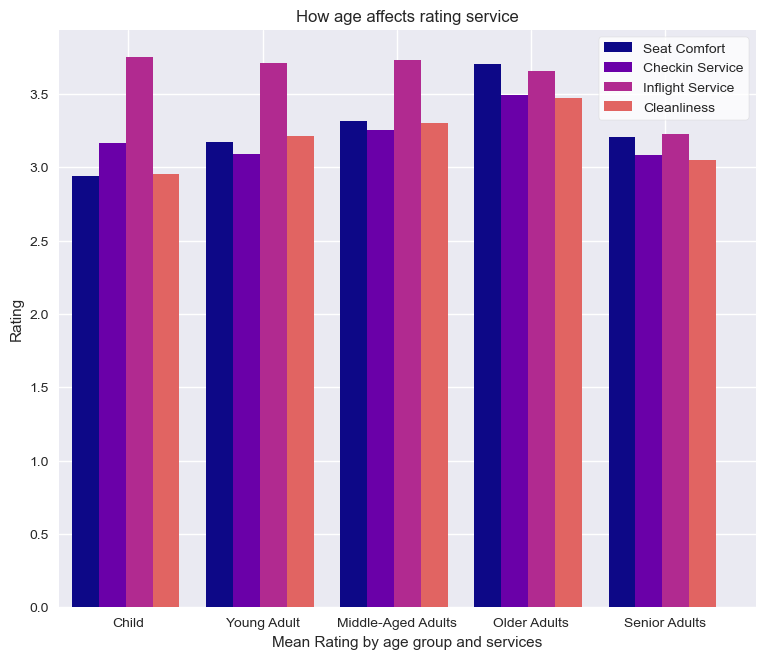

In [16]:
fig = plt.figure(figsize=(9,7.5))    # feel free to change the figsize if you wish
ax = fig.add_subplot(111)

# TODO: complete your own visualization here
ages = {'Child': [0,17], 'Young Adult': [18,24], 'Middle-Aged Adults':[25,34], 
        'Older Adults':[35,59], 'Senior Adults':[60,200]}
cols = air_sat.columns[3:7]
for i,num in enumerate(ages):
    people = air_sat[(air_sat['age'] >= ages[num][0]) & (air_sat['age'] <= ages[num][1])]
    for j, col_name in enumerate(cols):
        col = people.loc[:,col_name]
        means = np.mean(people[col_name])
        plt.bar(1+(i*width*5)+(width*j), means,width, color=colors[:][j])
        
# matching the category labels to the location, adjusting the x-bounds of the plot and adding the title
plt.xticks(0.8+width*2+np.arange(5)*width*5,
           ["Child", "Young Adult", "Middle-Aged Adults", "Older Adults", "Senior Adults"])
plt.xlim([1-width, 1+width*25]) 
ax.set_xlabel("Mean Rating by age group and services")
ax.set_ylabel("Rating")
ax.set_title("How age affects rating service")    
    
rating = {"Seat Comfort", "Checkin Service", "Inflight Service", "Cleanliness"}
plt.legend(rating, frameon = True, facecolor="white")
plt.show()


## Question 3: Hypothesising Happiness
Hypothesis testing is a statistical method used to determine whether data differs *significantly* from some baseline or another set of data. For example, if we have both males and females running in a race and have recorded their record times, we may want to see whether there is a significant difference in the running speed between genders. Alternatively, if someone claims that the average running speed of males is 15km/h, we may want to see if we have evidence to reject that claim.

Hypothesis tests follow a fairly rigorous structure.
1. First, we create a <b>null hypothesis ($H_0$)</b> and an <b>alternate hypothesis ($H_A$)</b>. The null hypothesis represents the 'default', which is assuming that the claim is true (eg. running speeds are equivalent between genders, or the running speed average is equal to 15km/h), and the alternate hypothesis is the opposite of that (eg. running speeds not equivalent).
2. Using our data, we calculate a <b>test statistic</b> or, similarly, a <b>p-value</b> which summarises the data in relation to the hypothesis you're testing.
3. By comparing our test statistic to a calculated cutoff, or similarly comparing the p-value to the chosen <b>significance level ($\alpha$)</b> (by default, $\alpha$=0.05), we can conclude whether we <b>reject the null hypothesis</b> (i.e. $p < \alpha$) or <b>fail to reject the null hypothesis</b> (note that we do not "accept" the null hypothesis in any case).
4. From the conclusion of our test, we can see whether the claim is accurate or not, and report our findings.

Thankfully, the SciPy package does most of the work for us - we just need to figure out which function to call depending on the type of question we want to answer. Each of the following returns a tuple with `(test_statistic, p_value)`.

| Function                     | Description |
| ---:                         | :---        |
| `stats.ttest_1samp`          | performs a hypothesis test for the mean of *one* group of scores (against a baseline)<br>eg. claiming a student's average mark is 76% |
| `stats.ttest_ind`, `stats.ttest_ind_from_stats`         | performs a hypothesis test for the mean between *two independent* groups of scores<br>eg. claiming the average marks between two similar courses are the same |
| `stats.ttest_rel`  | performs a hypothesis test for the mean between *two related* groups of scores<br>eg. claiming that a particular student's average marks in two different courses are the same |

Let's revisit our airline passenger satisfaction data.

In [8]:
# import data again
air_sat = pd.read_csv("data/airline_satisfaction.csv", index_col=0)
air_sat.head()

,gender,age,class,seat_comfort,checkin_service,inflight_service,cleanliness,dep_delay,arr_delay
0,Male,31,Eco,2,4,4,2,0,0.0
1,Male,8,Eco,1,4,4,1,18,13.0
2,Female,35,Business,3,1,3,3,0,0.0
3,Female,27,Business,3,4,5,3,24,23.0
4,Male,23,Business,2,3,4,2,0,0.0


Suppose we want to determine whether the check-in service rating differs between Economy (Eco) and Business passengers. First, let's create our hypotheses:

$H_0$: Check-in service rating is equivalent between Economy and Business passengers; $H_A$: Check-in service rating is different between Economy and Business passengers.

Now we determine which of the SciPy functions to call. As we're dealing with two groups of scores (Economy and Business), and the scores are unrelated (different passengers are in each, so scores are independent), we would use the `stats.ttest_ind` function.

In [51]:
# we'll split our data
economy = air_sat[air_sat.loc[:,"class"]=="Eco"].loc[:,"checkin_service"]
business = air_sat[air_sat.loc[:,"class"]=="Business"].loc[:,"checkin_service"]

# now we just call the function
t,p = stats.ttest_ind(economy, business)
print("p-value:", p)

p-value: 1.1927497471509302e-05


We see that the p-value is very small (e-05 is equivalent to $\times 10^{-5}$, so $p=0.00001193$), and because it is less than $\alpha=0.05$, it lies in the <b>rejection region</b>. Thus we <b>reject the null hypothesis</b>; we have sufficient data to indicate that the check-in service rating is *statistically different* between Economy and Business passengers.

### Q3.1 Comparing Cleanliness Rating based on Departure Delay
Alex believes that airline passengers give different ratings if their flight is delayed, even if otherwise the actual service may not be any different. This might be because the passengers are grumpy, so it affects their feelings for the rest of the flight.

To check this, please perform a hypothesis test (you'll need to determine which hypothesis test is most appropriate between one-sample, independent or related) for cleanliness rating based on two groups: passengers whose flight was not delayed at all (`dep_delay == 0`), and passengers whose flight was delayed (`dep_delay != 0`).

In [58]:
# TODO: split data and print p-value for hypothesis test
Hzero = air_sat[air_sat["dep_delay"]==0]["cleanliness"]
Hone = air_sat[air_sat["dep_delay"]!=0]["cleanliness"]
t,p = stats.ttest_ind(Hzero,Hone)
print(p)



0.07792123771600831


### Q3.2 Comparing In-Flight Ratings and Checki-in Ratings

Ben thinks that passengers rate in-flight service around the same that they rate cleanliness, because these both relate to their satisfaction during the flight.

Before running a hypothesis test, first look at the means, the standard deviations of the difference between in-flight service and check-in service, and the number of samples, and then decide for yourself whether you think that these are *statistically equivalent*.  (i.e. that the means are pretty much the same)

In [63]:
# TODO: print the means, standard deviations of the differences, number of samples here

print("In flight ratings mean : ", np.mean(air_sat["inflight_service"]))
print(" checkin ratings mean : ", np.mean(air_sat["checkin_service"]))
print("StrandardDeviation difference with  In flight and checkin : ", np.std(air_sat["inflight_service"])-np.std(air_sat["checkin_service"]))
print("total amount of sample : ", len(air_sat))


In flight ratings mean :  3.649
 checkin ratings mean :  3.336
StrandardDeviation difference with  In flight and checkin :  -0.10044225190615097
total amount of sample :  1000


Now run a hypothesis test for two groups - `checkin_service` and `in-flight service` (again, you must determine which test is most suitable). Be sure to include all the steps in your test (as we'll be expecting all steps for future assessment).

In [65]:
# TODO: find the p-value
t,p = stats.ttest_ind(air_sat["inflight_service"],air_sat["checkin_service"])
print(p)

9.125541262271041e-09


In [ ]:
TODO: tell your conclusion
    0.05보다 작으니까 관련성이 없다

Does the answer from the hypothesis test you just ran match the guess you made before? Why or why not? You might like to discuss this with your tutor or classmates.

### Q3.3 Checking Average Age of Passengers
For simplicity in reporting, Afzal wants to claim that the average age of passengers is 40 years. As before, first look at the mean, standard deviation and number of samples of the age of passengers and decide whether this is "close enough" to 40. Then run a hypothesis test, ensuring that you include all steps. Does your guess match the conclusion from the hypothesis test? Why or why not?

In [ ]:
# TODO: write your code here; feel free to add more cells

*****

## Homework & Extension Questions
We suggest that you finish the previous questions before moving on to the extension questions.

### Q4: Adding to a previous plot
In Q1.4, we challenged you to add a missing piece (which was either a legend or sub-labels on the x-axis under each bar indicating each rating level). We also suggested that you adjust the plot if you thought it wasn't sufficient.

In addition to the above, we'd also like to include the mean in the plot (not necessarily for comparison). You can do this however you'd like, but if you're stuck for ideas you can use `plt.vlines()` to create vertical lines in the plot.

We've included the same code as above here for your convenience.

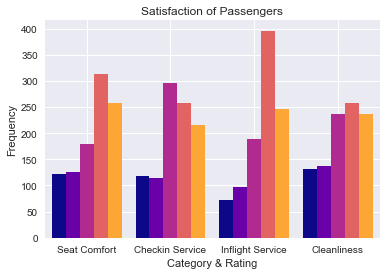

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

cols = air_sat.columns[3:7]
colors = cm.plasma(np.arange(5)/5.)    # returns a list of 5 RGBA values
width = 0.5

for i,col_name in enumerate(cols):
    col = air_sat.loc[:,col_name]
    for rating in range(5):
        plt.bar(1+(i*width*6)+(width*rating), len(col[col==rating+1]), width, color=colors[:][rating])
        
plt.xticks(1+width*2+np.arange(5)*width*6,
           ["Seat Comfort", "Checkin Service", "Inflight Service", "Cleanliness"])
plt.xlim([1-width, 1+width*23])
ax.set_xlabel("Category & Rating")
ax.set_ylabel("Frequency")
ax.set_title("Satisfaction of Passengers")

plt.show()

### Q5: One-Sided Hypothesis Test
In Q3.1, you would have run a test to determine whether passengers give *different* ratings depending on whether their flight was delayed - this is a two-tailed test (i.e. the alternate hypothesis includes the possibility that it is either higher or lower). However, we'd really expect ratings to be *lower* if a passenger's flight is delayed - this is a <b>one-sided hypothesis test</b>.

Running a one-sided test is fairly similar to a two-tailed test, except that we adjust the alternate hypothesis and <b>halve the resulting p-value</b> before interpreting its value. You will also need to confirm that the side you are checking is accurate (in this case, check that the cleanliness rating mean is lower for delayed flights than non-delayed flights).

Run a one-sided hypothesis test to determine whether the cleanliness rating is *lower* if the flight was delayed. We've written up the hypotheses to guide you.

*Hint: you should reach a different conclusion to the two-tailed test.*

In [ ]:
# TODO: your answer here
